<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/CURSO_IBM_DATA_ANALYSIS/IBMDataAnalPythonMod5MODELEVALUAT_DanielHdezM_A01793538.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CURSO IBM DATA ANALYSIS WITH PYTHON**

**MODULO 5: MODEL EVALUATION**

**MATERIA : CIENCIA DE DATOS**

**ALUMNO : DANIEL HERNANDEZ MORA**

**MATRICULA : A01793538**

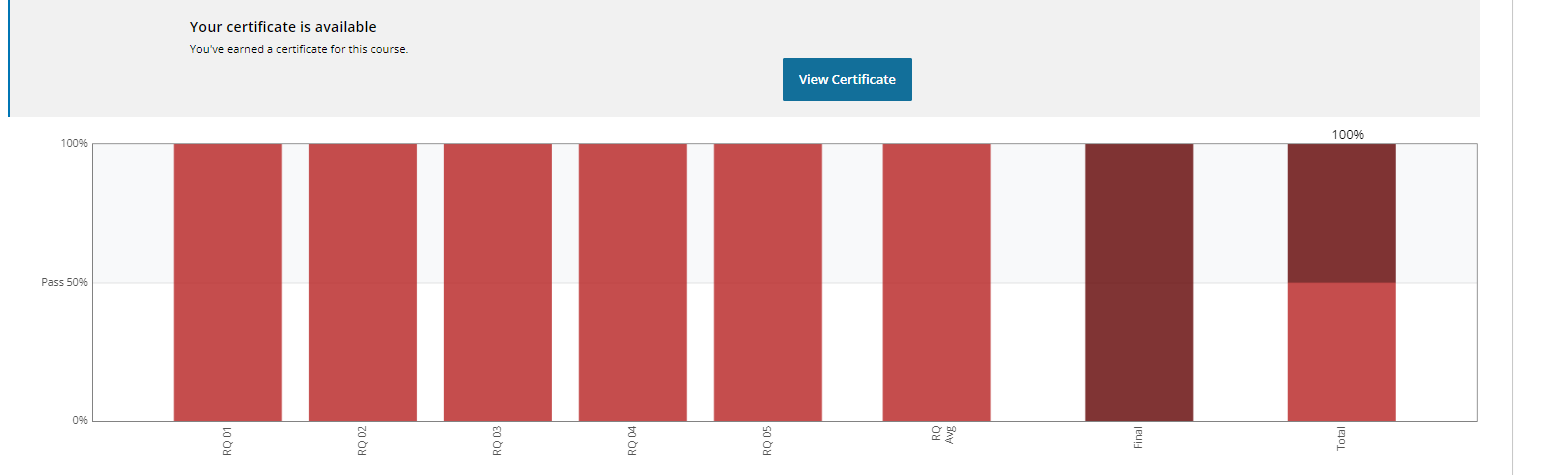

Procedemos a cargar las librerias iniciales y a cargar el dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filename = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [ ]:
df = pd.read_csv(filename)

In [ ]:
df.to_csv('module_5_auto.csv')

In [ ]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

Functions for Plotting

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Un paso importante para probar el modelo es dividir sus datos en datos de entrenamiento y prueba. Colocaremos el precio objetivo de los datos en un marco de datos separado "y_data"

In [ ]:
y_data = df['price']

"x_data" será el resto de las columnas excluyendo "price"

In [ ]:
x_data=df.drop('price',axis=1)

Ahora, dividimos aleatoriamente nuestros datos en datos de entrenamiento y prueba usando la función train_test_split.

El parámetro test_size establece la proporción de datos que se dividen en el conjunto de prueba. En lo anterior, el conjunto de prueba es el 10% del conjunto de datos total.

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


**Ejercicio 1**

Utilice la función "train_test_split" para dividir el conjunto de datos de modo que el 40% de las muestras de datos se utilicen para la prueba. Establezca el parámetro "random_state" igual a cero. La salida de la función debe ser la siguiente: "x_train1", "x_test1", "y_train1" y "y_test1"

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


Importamos LinearRegression desde el módulo linear_model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lre=LinearRegression()

Ajustamos el modelo usando la función "horsepower":

In [ ]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculamos el valor de  R Cuadrada en los datos de prueba:

In [ ]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

Calculamos el valor de R Cuadrada en los datos de entrenamiento:

In [ ]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

Podemos ver que el valor de R cuadrada es mucho más pequeño usando los datos de prueba en comparación con los datos de entrenamiento.

**Ejercicio 2**

Encuentre el valor de R cuadrada en los datos de prueba usando el 40 % del conjunto de datos para la prueba.

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973


Importamos model_selection desde el módulo cross_val_score.

In [ ]:
from sklearn.model_selection import cross_val_score

Ingresamos el objeto, la función ("horsepower") y los datos de destino (y_data). El parámetro 'cv' determina el número de pliegues. En este caso son 4.

In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [ ]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Calculamos el promedio y la desviación estándar de nuestra estimación:

In [ ]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


Podemos usar el error cuadrático negativo como puntaje configurando la métrica del parámetro 'puntuación' en 'neg_mean_squared_error'.

In [ ]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

**Ejercicio 3**

Calcula el valor de R cuadrada promedio usando dos pliegues, luego encuentre el valor de r cuadrada promedio para el segundo pliegue utilizando la función "horsepower":

In [ ]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

** Overfitting, Underfitting y Selección de Modelo**

Resulta que los datos de prueba, a veces denominados "datos fuera de muestra", son una medida mucho mejor de qué tan bien funciona su modelo en el mundo real. Una de las razones de esto es el sobreajuste.

Repasemos algunos ejemplos. Resulta que estas diferencias son más evidentes en la regresión lineal múltiple y la regresión polinomial, por lo que exploraremos el sobreajuste en ese contexto.

Vamos a crear objetos de regresión lineal múltiple y entrenar el modelo usando 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' como características.

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [ ]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [ ]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Realicemos una evaluación del modelo usando nuestros datos de entrenamiento y prueba por separado. Primero, importamos la biblioteca seaborn y matplotlib para el trazado.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


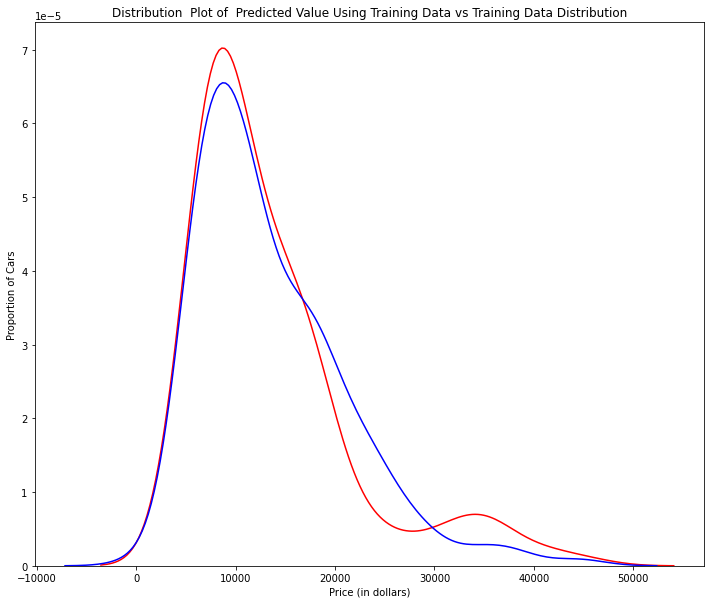

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Hasta ahora, el modelo parece estar aprendiendo bien del conjunto de datos de entrenamiento. Pero, ¿qué sucede cuando el modelo encuentra nuevos datos del conjunto de datos de prueba? Cuando el modelo genera nuevos valores a partir de los datos de prueba, vemos que la distribución de los valores predichos es muy diferente de los valores objetivo reales.

**Overfitting**

El sobreajuste ocurre cuando el modelo se ajusta al ruido, pero no al proceso subyacente. Por lo tanto, al probar su modelo con el conjunto de prueba, su modelo no funciona tan bien ya que está modelando ruido, no el proceso subyacente que generó la relación. Vamos a crear un modelo polinomial de grado 5.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Usemos el 55 por ciento de los datos para entrenamiento y el resto para pruebas:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


Usaremos la función "PollyPlot" que definimos al comienzo de la práctica de laboratorio para mostrar los datos de entrenamiento, los datos de prueba y la función predicha.

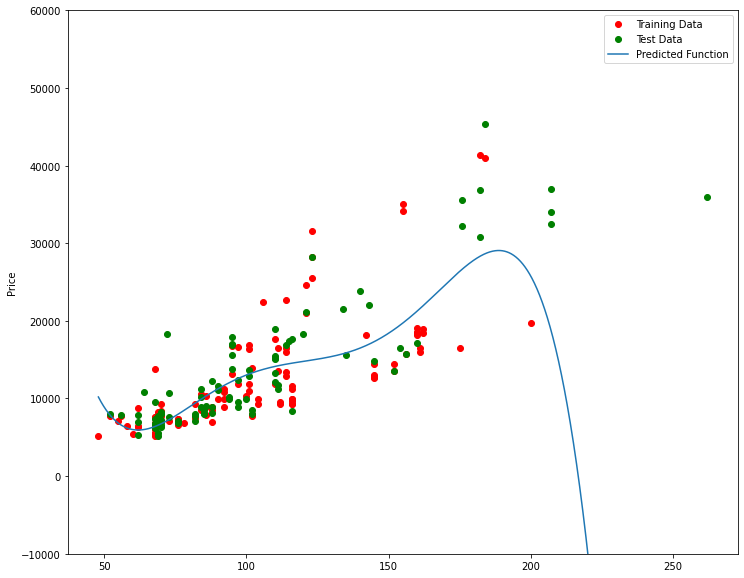

In [ ]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)


Vemos que la función estimada parece rastrear los datos, pero alrededor de 200 caballos de fuerza, la función comienza a divergir de los puntos de datos.

Calculemos la R cuadrada para los datos de entrenamiento:

In [ ]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [ ]:
poly.score(x_test_pr, y_test)

-29.87134030204415


Vemos que el cáculo de R cuadrada para los datos de entrenamiento es 0.5567 mientras que elvaor de R caudrada en los datos de prueba fue -29.87. Cuanto menor sea el valor de R cuadrada, peor será el modelo. Un valor de R cuadrada negativo es un signo de sobreajuste.

Veamos cómo cambia el valor de R cuadrada en los datos de prueba para polinomios de diferente orden y luego representemos los resultados:

Text(3, 0.75, 'Maximum R^2 ')

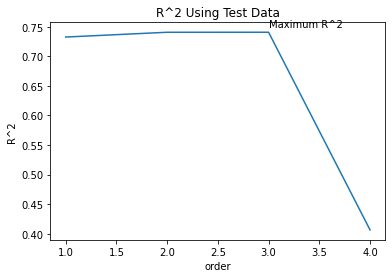

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

Vemos que valor de R cuadrada aumenta gradualmente hasta que se usa un polinomio de orden tres. Luego, el valor de R cuadrada disminuye drásticamente en un polinomio de orden cuatro.

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Ejercicio 4A

Podemos realizar transformaciones polinómicas con más de una característica. Cree un objeto "PolynomialFeatures" "pr1" de grado dos

In [ ]:
pr1=PolynomialFeatures(degree=2)

Ejercicio 4B

Transforme las muestras de entrenamiento y prueba para las características 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. 
Sugerencia: use el método "fit_transform"

In [ ]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Ejercicio 4C

¿Cuántas dimensiones tiene la nueva función? Sugerencia: use el atributo "Shape".

In [ ]:
x_train_pr1.shape

(110, 15)

Ejercicio 4D


Cree un modelo de regresión lineal "poly1". Entrena el objeto usando el método "ajuste" usando las características polinómicas.

In [ ]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

Ejercicio 4E

Use el método "predict" para predecir una salida en las características polinómicas, luego use la función "DistributionPlot" para mostrar la distribución de la salida de prueba pronosticada frente a los datos de prueba reales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


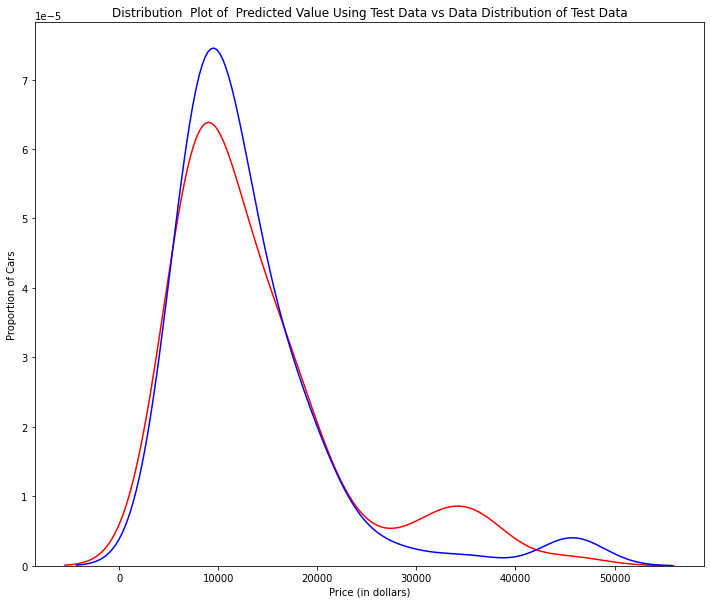

In [ ]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

Ejercicio 4F

Usando el gráfico de distribución anterior, describa (en palabras) las dos regiones donde los precios pronosticados son menos precisos que los precios reales.


    >  El valor pronosticado es más alto que el valor real para automóviles en los que el rango de precio es de $10 000; por el contrario, el precio pronosticado es más bajo que el costo del precio en el rango de $30 000 a $40 000. Como tal, el modelo no es tan preciso en estos rangos.

**Ridge Regression**

En esta sección, revisaremos Ridge Regression y veremos cómo el parámetro alfa cambia el modelo. Solo una nota, aquí nuestros datos de prueba se utilizarán como datos de validación.

Realicemos una transformación polinomial de grado dos en nuestros datos

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RigeModel=Ridge(alpha=1)

In [ ]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [ ]:
yhat = RigeModel.predict(x_test_pr)

In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


Seleccionamos el valor de alfa que minimiza el error de prueba. Para hacerlo, podemos usar un bucle for. También hemos creado una barra de progreso para ver cuántas iteraciones hemos completado hasta ahora.

In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 192.91it/s, Test Score=0.564, Train Score=0.859]


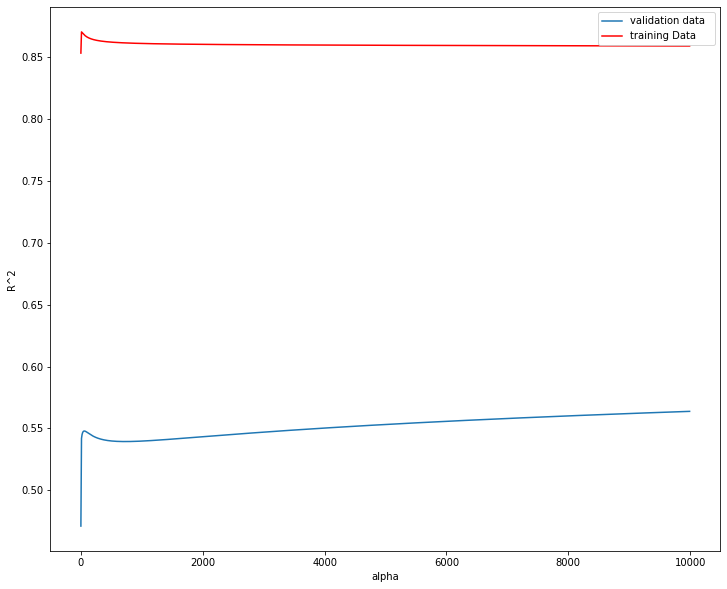

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Aquí, el modelo se construye y prueba con los mismos datos, por lo que los datos de entrenamiento y prueba son los mismos.

La línea roja en la Figura 4 representa el valor de R cuadrada de los datos de entrenamiento. A medida que alfa aumenta, R cuadrada disminuye. Por lo tanto, a medida que aumenta alfa, el modelo funciona peor en los datos de entrenamiento

La línea azul representa el valor de R cuadrada en los datos de validación. A medida que aumenta el valor de alfa, R cuadrada aumenta y converge en un punto.

**Ejercicio 5**

Realice la regresión de Ridge. Calcule el valor de R cuadrada usando las características polinómicas, use los datos de entrenamiento para entrenar el modelo y use los datos de prueba para probar el modelo. El parámetro alfa debe establecerse en 10.

In [ ]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

**Grid Search**

El término alfa es un hiperparámetro. Sklearn tiene la clase GridSearchCV para simplificar el proceso de encontrar el mejor hiperparámetro.

Importemos GridSearchCV desde el módulo model_selection.

In [ ]:
from sklearn.model_selection import GridSearchCV


Creamos un diccionario de valores de parámetros:

In [ ]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]


Creamos un objeto de regresión Ridge:

In [ ]:
RR=Ridge()
RR

Ridge()


Cree un objeto de búsqueda de ridge grid

In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)


Ajustamos el modelo:

In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

El objeto encuentra los mejores valores de parámetros en los datos de validación. Podemos obtener el estimador con mejores parámetros y asignarlo a la variable BestRR de la siguiente manera

In [ ]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Ahora probamos nuestra modelo en los datos de prueba:

In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151